/var/folders/fm/bjbc71f52r38jr1_2bv3hz1m0000gn/T/ipykernel_47588/1638237845.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipo['choice_description'][num]=re.sub(pattern='[^a-zA-Z,() ]',repl='',string=i)


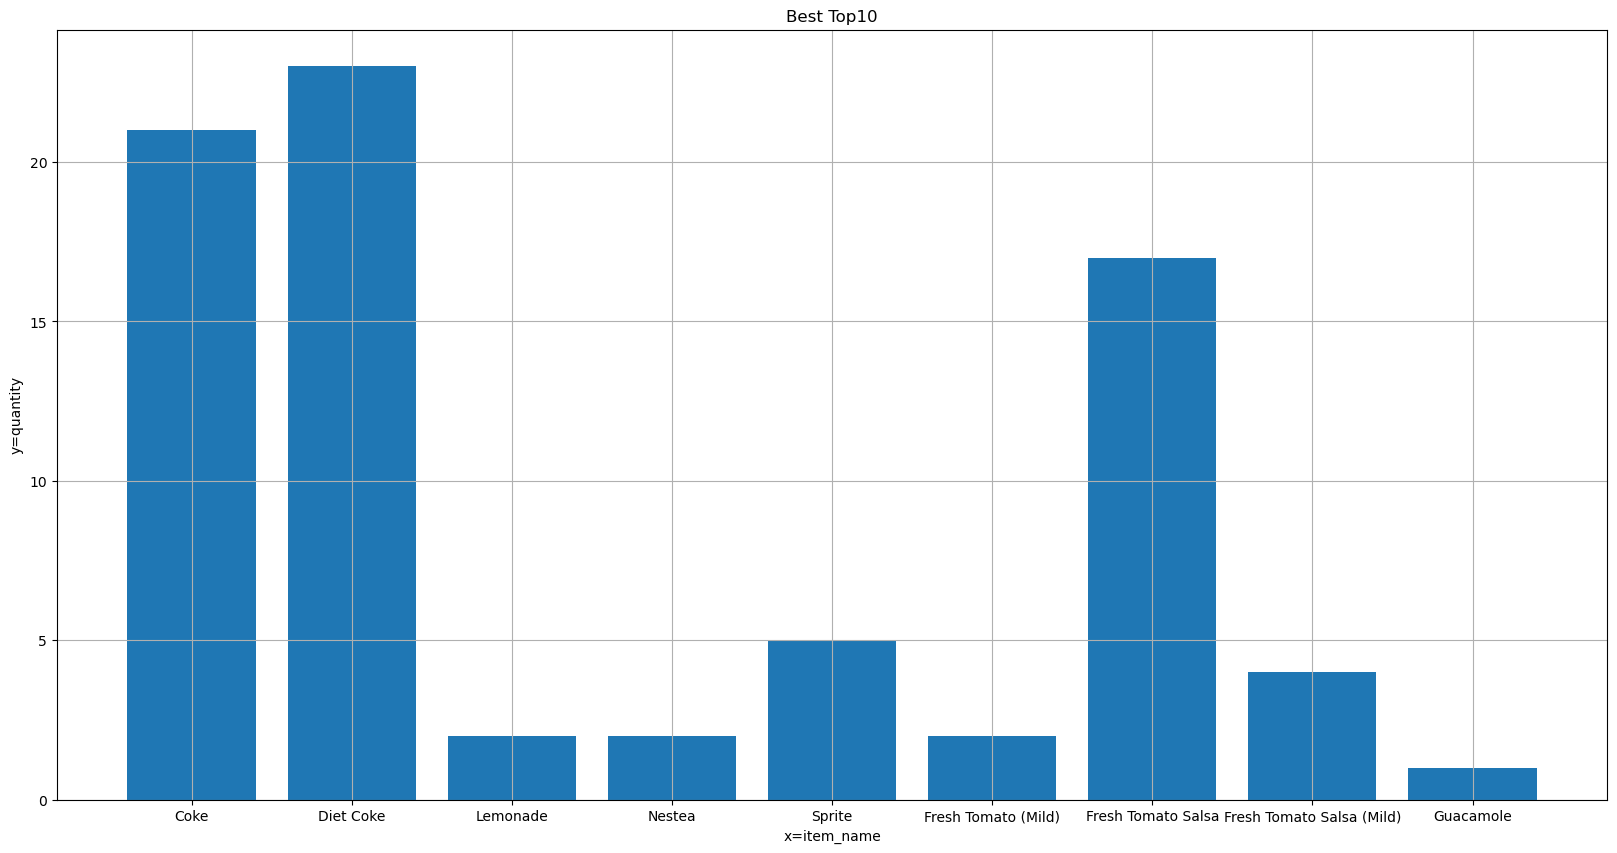

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

file_path = './Data_file/chipotle.csv'

#sep = seperate, 탭으로 구분한다.
chipo = pd.read_csv(file_path)

#집계를 위해 필요없는 열을 날리기
chipo.drop(['order_id', 'item_price'], axis='columns', inplace=True)

# choice_description에 있는 NaN을 origin 바꾸기
chipo['choice_description']=chipo['choice_description'].fillna('origin')

# 대괄호 지우기
#[^a-zA-Z,] 은 알파벳과 ',' 그리고 공백을 제외하고 모두 지우겠다는 의미. 
num=0 
for i in chipo['choice_description'] : 
   chipo['choice_description'][num]=re.sub(pattern='[^a-zA-Z,() ]',repl='',string=i)
   num+=1

# 메뉴 이름만 뽑아내기
v_split=chipo['choice_description'].str.split(",",expand=True)
chipo['saurce']=v_split.get(0)
v_split.pop(0)
#print(v_split)

#집계를 위해 필요없는 열을 날리기
chipo.drop(['choice_description'], axis='columns', inplace=True)

# # 중복된 데이터 count에 합치기
result_tmp=chipo.groupby(['item_name','saurce']).value_counts()
result_tmp=result_tmp.to_frame('count')

# 결과 엑셀로 출력
file_path='./chipotle_result.csv'
result_tmp.to_csv(file_path,sep=',')

# #전체 데이터 출력
# result_tmp

#차트의 크기를 조정. (가로, 세로)
plt.rcParams["figure.figsize"] = (20,10)

#차트 눈금선을 표기
plt.rcParams['axes.grid'] = True 

temp = pd.read_csv('./chipotle_result.csv')
temp = temp.head(10)  # 데이터의 상위 10개만 선택

#'item_name'과 'quantity'를 별도로 추출
temp_df = pd.DataFrame({'saurce': temp['saurce'], 'count': temp['count']})
x=temp_df['saurce']
y=temp_df['count']

plt.bar(x,y)
plt.xlabel('x=item_name')
plt.ylabel('y=quantity')
plt.title('Best Top10')
plt.show()
